In [14]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import squarify

In [16]:
data = {
    'Web': {
        'Account Mgmt': {
            'Change Billing Address': 83947,
            'Add/Edit Phone Number': 137600,
            'Change User Name, Password': 159607
        },
        'Alerts & Notifications': {
            'Change Billing & Payment Alerts': 302380,
            'Energy Alerts': 233548,
            'Outages Alerts': 12242,
            'Go Paperless Alerts': 25758,
            'Notices & Services Information': 10738,
            'Event Day Alerts': 16104,
            'Service Visit Alerts': 3697,
            'Additional Communication Alerts': 3892,
            'Additional Communication Alerts (Aug Onward)': 4794,
            'Payment Plan & Shutoff Nonpayment Alerts': 16992
        },
        'Billing': {
            'ViewBillCurrentPDF': 8992263,
            'ViewBillCurrentPDF historical': 9361207
        },
        'Other Interactions': {
            'Gas Pipeline Map Views': 15393,
            'Recurring Payment Schedule': 756747,
            'Registration': 538774
        },
        'Outage': {
            'Report Outage Outage Map': 549793,
            'Search Outage By Address (outage Center/ Outage Map/ Address Look up)': 4516009,
            'Subscribe Outage (EW Pages)': 80199
        },
        'Payment Account': {
            'Create Payment Account': 663126,
            'Update Payment Account': 16176,
            'Delete Payment Account': 244317
        },
        'Payments': {
            'One Time Access': 3633827,
            'Your Account': 24316220
        },
        'Pay Plans': {
            'Extension Pay': 79960,
            'Installment Pay': 220049
        },
        'Pilot Light Appointments': {
            'Schedule Service Appointment': 18987,
            'Reschedule Service Appointment': 1148,
            'Cancel Service Appointment': 1907
        },
        'Start/Stop/Transfer (total)': {
            'New Customer': 200864,
            'Existing Customer': 82019,
            'Stop': 178445,
            'Transfer': 80187
        },
        'Usage and Rates': {
            'View Usage (July Onward)': 633871,
            'View Usage': 2559618,
            'Compare My Bills': 1425106,
            'Rate Comparison': 310259,
            'Home Energy Checkup': 362420,
            'Online Rate Enrollment': 140820,
            'Compare My Bills UPDATED': 1310655
        }
    }
}


In [17]:
#v2 format for data
# Define the data
data = {
    "Web": {"Account Mgmt": 381154, "Alerts & Notifications": 630145, "Billing": 18353470, "CARE/FERA New Pages": 278569, "Other Interactions": 1310914, "Outage": 5146001, "Payment Account": 923619, "Payments": 27950047, "Pilot Light Appointments": 22042, "Start/Stop/Transfer (total)": 541515, "Usage and Rates": 6742749},
    "Account Mgmt": {"Change Billing Address": 83947, "Add/Edit Phone Number": 137600, "Change User Name, Password": 159607},
    "Alerts & Notifications": {"Change Billing & Payment Alerts": 302380, "Energy Alerts": 233548, "Outages Alerts": 12242, "Go Paperless Alerts": 25758, "Notices & Services Information": 10738, "Event Day Alerts": 16104, "Service Visit Alerts": 3697, "Additional Communication Alerts": 3892, "Additional Communication Alerts (Aug Onward)": 4794, "Payment Plan & Shutoff Nonpayment Alerts": 16992},
    "Billing": {"ViewBillCurrentPDF": 8992263, "ViewBillCurrentPDF historical": 9361207},
    "Other Interactions": {"Gas Pipeline Map Views": 15393, "Recurring Payment Schedule": 756747, "Registration": 538774},
    "Outage": {"Report Outage Outage Map": 549793, "Search Outage By Address (outage Center/ Outage Map/ Address Look up)": 4516009, "Subscribe Outage (EW Pages)": 80199},
    "Payment Account": {"Create Payment Account": 663126, "Update Payment Account": 16176, "Delete Payment Account": 244317},
    "Payments": {"One Time Access": 3633827, "Your Account": 24316220},
    "Pilot Light Appointments": {"Schedule Service Appointment": 18987, "Reschedule Service Appointment": 1148, "Cancel Service Appointment": 1907},
    "Start/Stop/Transfer (total)": {"New Customer": 200864, "Existing Customer": 82019, "Stop": 178445, "Transfer": 80187},
    "Usage and Rates": {"View Usage (July Onward)": 633871, "View Usage": 2559618, "Compare My Bills": 1425106, "Rate Comparison": 310259, "Home Energy Checkup": 362420, "Online Rate Enrollment": 140820, "Compare My Bills UPDATED": 1310655}
}

C:\Users\admin\AppData\Local\Temp\ipykernel_7344\524178254.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


TypeError: Axes.bar() got multiple values for argument 'x'

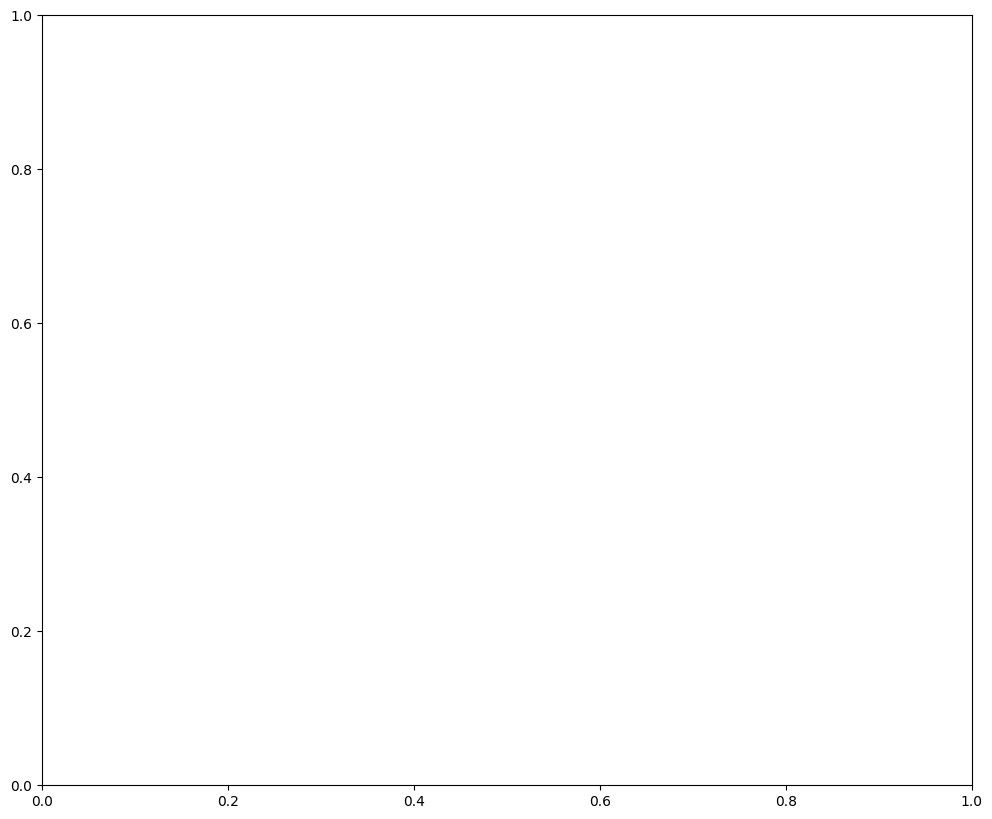

In [27]:
# Calculate the total size of each branch of the sunburst
total_size = {}
for k1, v1 in data.items():
    if isinstance(v1, int):
        total_size[k1] = v1
    else:
        total_size[k1] = sum(v1.values())

# Create a color map
cmap = cm.get_cmap('tab20c')

# Create a dictionary that maps each category to a color index
categories = list(data.keys())
cindex = dict(zip(categories, range(len(categories))))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))
x = 0
y = 0
width = 100
height = 100
pad = 2

# Compute the total size of each category
total_size = {}
for k1, v1 in data.items():
    if isinstance(v1, dict):
        total_size[k1] = sum(v1.values())
    else:
        total_size[k1] = v1

# Loop over the data and create the sunburst
for k1, v1 in data.items():
    size1 = total_size[k1]
    for i, (k, v) in enumerate(cindex.items()):
        if k == k1:
            color1 = cmap(i)
            break

    squarify.plot(sizes=[size1], x=x, y=y, color=color1, alpha=.8)
    sub_x = x + pad
    sub_y = y + pad
    sub_width = width * 0.7
    sub_height = height * 0.7
    if isinstance(v1, dict):
        sub_total_size = sum(v1.values())
        sub_cmap = cm.get_cmap('tab20c')
        for k2, v2 in v1.items():
            size2 = v2
            color2 = sub_cmap(cindex[k2])
            squarify.plot(sizes=[size2], x=sub_x, y=sub_y, color=color2, alpha=.8)
            sub_y += sub_height + pad
    x += width + pad


plt.axis('off')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_7344\2380309545.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c')


TypeError: list indices must be integers or slices, not str

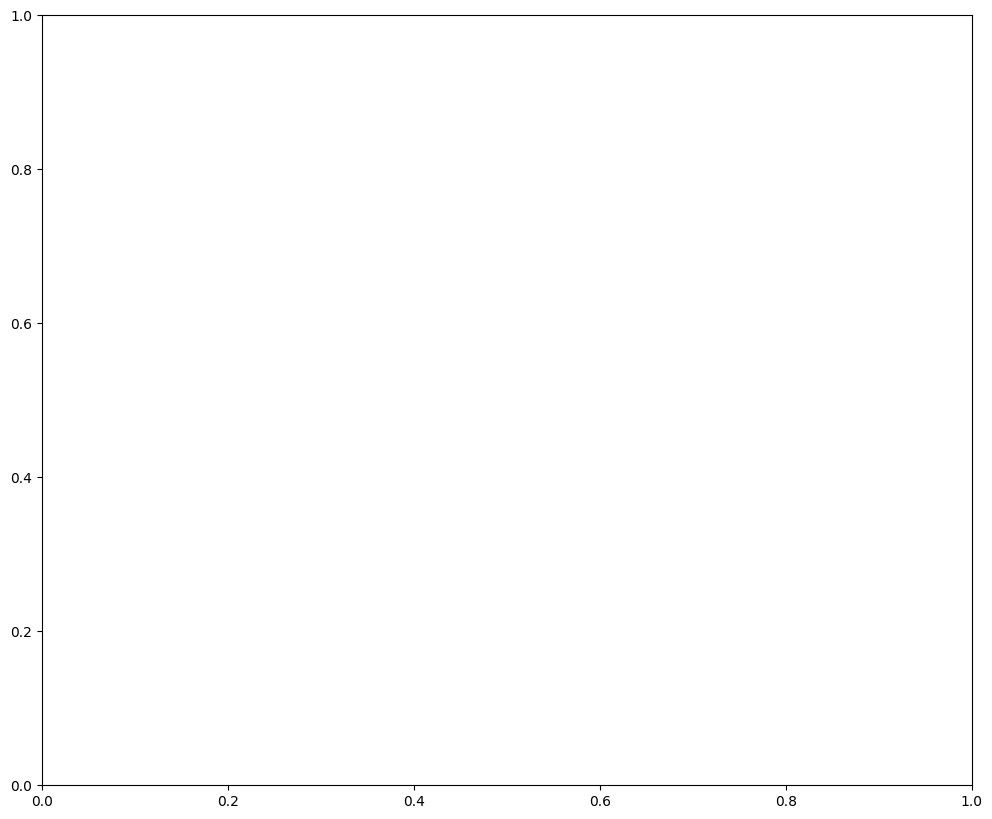

In [28]:
import matplotlib.pyplot as plt
import squarify

data = {
    "Customer Support": {
        "General": 1510000,
        "Billing Balance": 530000,
        "Order Change": 120000,
        "Technical": 49000
    },
    "ICM Tech": 2630000,
    "Non-IVR Tech": 1200000,
    "Call Center - Live Agent": {
        "General": 1341000,
        "Billing Balance": 239000,
        "Order Change": 77000,
        "Technical": 128000
    }
}

# Compute the total size of each group
total_size = {}
for k1, v1 in data.items():
    if isinstance(v1, dict):
        total_size[k1] = sum(v1.values())
    else:
        total_size[k1] = v1

# Create a color map
cmap = plt.cm.get_cmap('tab20c')
cindex = range(len(data))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))
x = 0
y = 0
width = 100
height = 100
pad = 1.5

# Loop over the data and create the sunburst
for k1, v1 in data.items():
    size1 = total_size[k1]
    color1 = cmap(list(cindex)[k1])
    squarify.plot(sizes=[size1], x=x, y=y, color=color1, alpha=.8)
    sub_x = x + pad
    sub_y = y + pad
    sub_width = width * 0.7
    sub_height = height * 0.7
    
    if isinstance(v1, dict):
        for k2, v2 in v1.items():
            size2 = v2
            color2 = cmap(cindex[k2])
            squarify.plot(sizes=[size2], x=sub_x, y=sub_y, color=color2, alpha=.8,
                          width=sub_width, height=sub_height)
            sub_y += sub_height + pad
            if sub_y + sub_height > y + height:
                sub_y = y + pad
                sub_x += sub_width + pad
            
    x += width + pad
    if x + width > 100:
        x = 0
        y += height + pad

# Configure the plot
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
plt.show()
